# Project Phase 1

name: Mahdi Hajialilue 

StudentID: 99100358

### Import libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

### import datasets

In [2]:
df_entities = pd.read_csv('entities.csv')
df_tweets = pd.read_csv('tweets.csv')
df_companies = pd.read_csv('companies.csv')
# df_users = pd.read_csv('users.csv')

### 1. Statistics on most and least tweeted stocks. Perform segmentation of the companies based on the number of tweets they have. Provide relevant visualizations. 

computing number of cashtags for each company

In [4]:

cashtag_counts = df_entities['text'].value_counts()

df_companies['tweet_count'] = df_companies['ticker'].map(cashtag_counts)

df_companies['tweet_count'].fillna(0, inplace=True)

#### plotting the results

1. Top 20 Most Tweeted Stocks

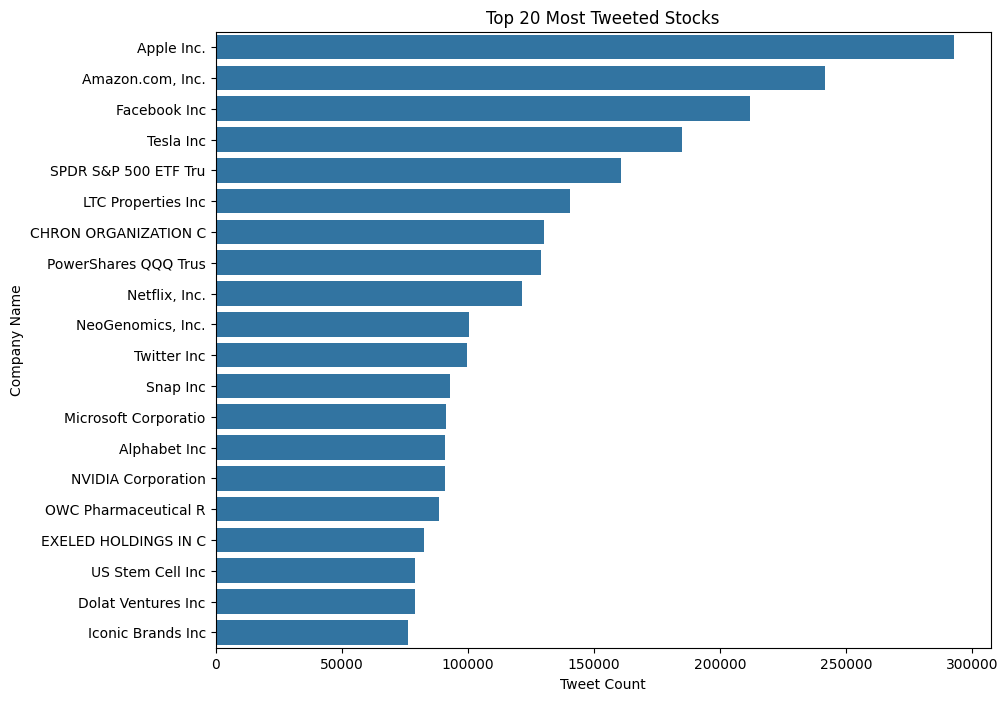

In [5]:
top_20 = df_companies.nlargest(20, 'tweet_count')

plt.figure(figsize=(10, 8))
sns.barplot(x='tweet_count', y='name', data=top_20)
plt.title('Top 20 Most Tweeted Stocks')
plt.xlabel('Tweet Count')
plt.ylabel('Company Name')
plt.show()



Plot Number of Cashtags and Market Cap

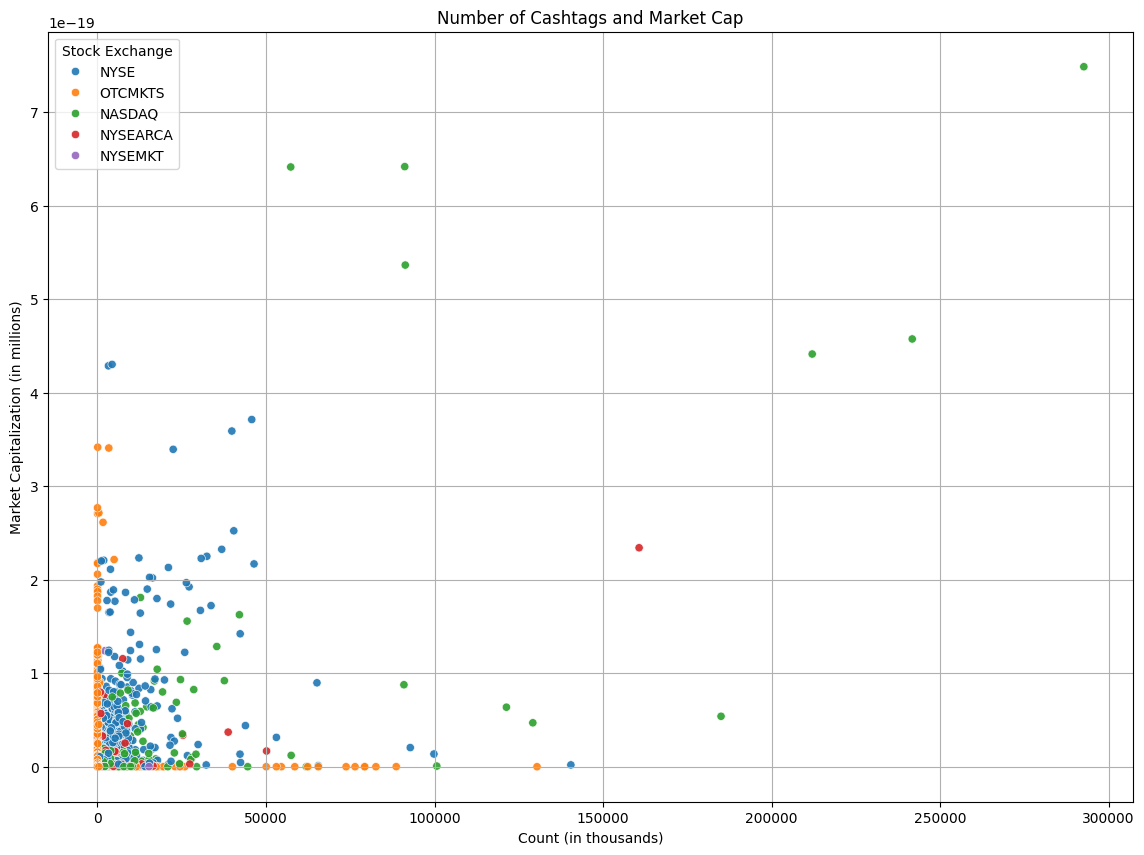

In [10]:
df_companies['capitalization'] = df_companies['capitalization'] / (10 ** 6)
plt.figure(figsize=(14, 10))  
sns.scatterplot(x='tweet_count', y='capitalization',
                hue='exchange', data=df_companies, palette='tab10', alpha=0.9)

plt.xlabel('Count (thousands)')
plt.ylabel('Market Cap (millions)')
plt.title('Number of Cashtags and Market Cap')
plt.legend(title='Stock Exchange')
plt.grid(True)
plt.show()

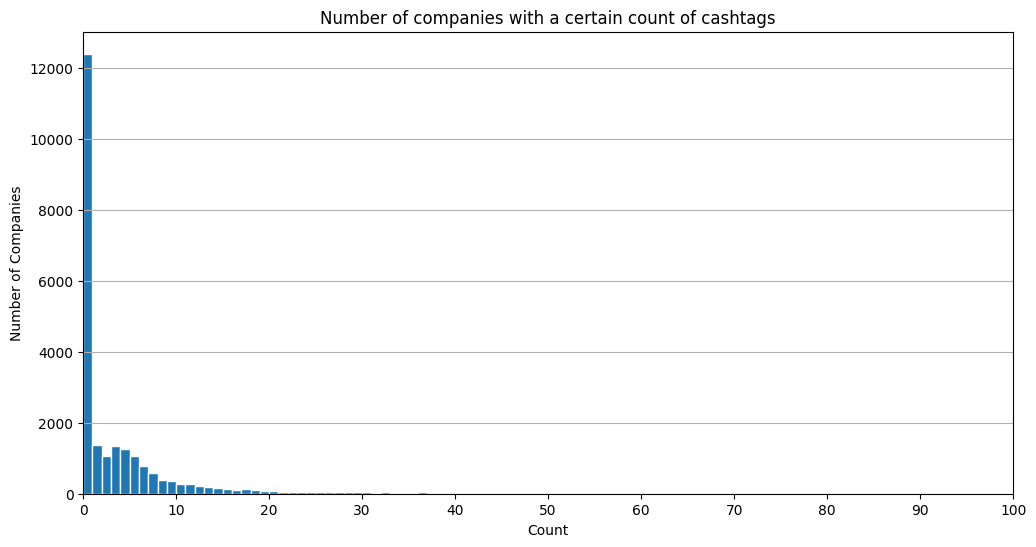

In [12]:
plt.figure(figsize=(12, 6))
plt.hist(df_companies['tweet_count'], bins=range(0, 101), edgecolor='white')
plt.title('Number of companies with a certain count of cashtags')
plt.xlabel('Count')
plt.ylabel('Number of Companies')
plt.xticks(range(0, 101, 10))  
plt.xlim(0, 100) 
plt.grid(axis='y')  
plt.show()

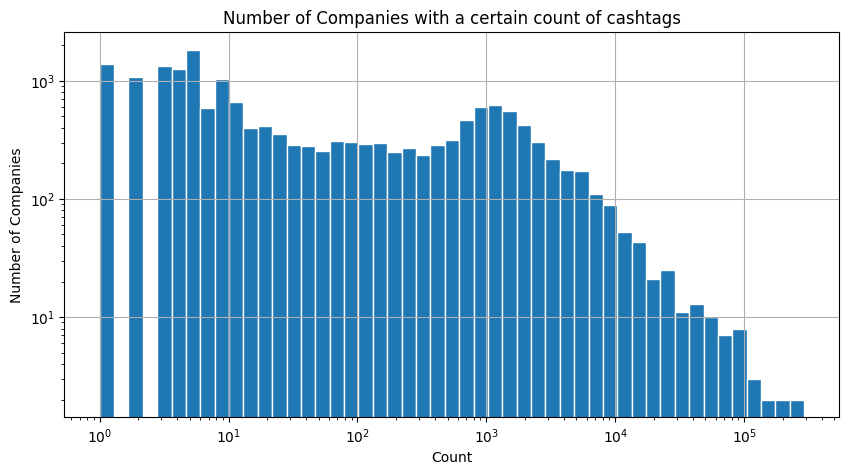

In [13]:
tweet_counts = df_companies['tweet_count']

# Logarithmic bins
bin_edges = np.logspace(np.log10(1), np.log10(tweet_counts.max()), num=50) 

plt.figure(figsize=(10, 5))
plt.hist(tweet_counts, bins=bin_edges, edgecolor='white')
plt.xscale('log')  
plt.yscale('log')  
plt.title('Number of Companies with a certain count of cashtags')
plt.xlabel('Count')
plt.ylabel('Number of Companies')
plt.grid(True)
plt.show()

Market cap for each exchange. 

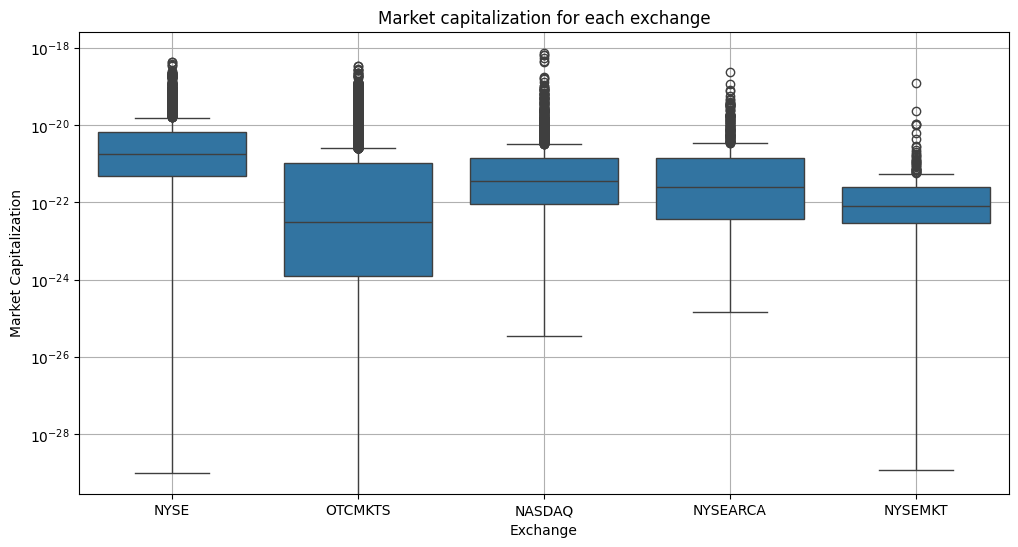

In [15]:
# logarithmic scale
plt.figure(figsize=(12, 6))
sns.boxplot(x='exchange', y='capitalization', data=df_companies)
plt.yscale('log')
plt.title('Market capitalization for each exchange')
plt.xlabel('Exchange')
plt.ylabel('Market Capitalization')
plt.grid(True)
plt.show()

### 2. Statistics on distributions of 5 individual stocks over time. Choose the individual stocks to perform reflect different sectors of the economy. 

Let's Choose 5 individual stocks:

Apple, Tesla, Microsoft, Amazon, General Motors.

In [16]:
print('Apple: \n', df_companies[df_companies['name'].str.contains('Apple')]) 
print('\n')

print('Tesla: \n', df_companies[df_companies['name'].str.contains('Tesla')]) 
print('\n')

print('Microsoft: \n', df_companies[df_companies['name'].str.contains('Microsoft')]) 
print('\n')

print('Amazon: \n', df_companies[df_companies['name'].str.contains('Amazon')]) 
print('\n')

print('General Motors: \n', df_companies[df_companies['name'].str.contains('General Motors')]) 




Apple: 
      ticker                  name exchange  capitalization  tweet_count
65     AAPL            Apple Inc.   NASDAQ    7.485500e-19     292631.0
1621   APLE  Apple Hospitality RE     NYSE    4.250000e-21       1278.0
3334   BLES  Apple Green Holding   OTCMKTS    2.140000e-24          6.0


Tesla: 
       ticker       name exchange  capitalization  tweet_count
27171   TSLA  Tesla Inc   NASDAQ    5.394000e-20     184998.0


Microsoft: 
       ticker                  name exchange  capitalization  tweet_count
17985   MSFT  Microsoft Corporatio   NASDAQ    5.364600e-19      91313.0


Amazon: 
      ticker                name exchange  capitalization  tweet_count
1392   AMZN    Amazon.com, Inc.   NASDAQ    4.574300e-19     241721.0
1393   AMZO  Amazon Biotech Inc  OTCMKTS             NaN          0.0


General Motors: 
       ticker                  name exchange  capitalization  tweet_count
11571     GM  General Motors Compa     NYSE    5.181000e-20      23758.0
11572   GM-B  Gener

Therefore:

In [18]:
# Convert the 'created_at' column to datetime
df_tweets['created_at'] = pd.to_datetime(df_tweets['created_at'])

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18424\3545048924.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_tweets['created_at'] = pd.to_datetime(df_tweets['created_at'])


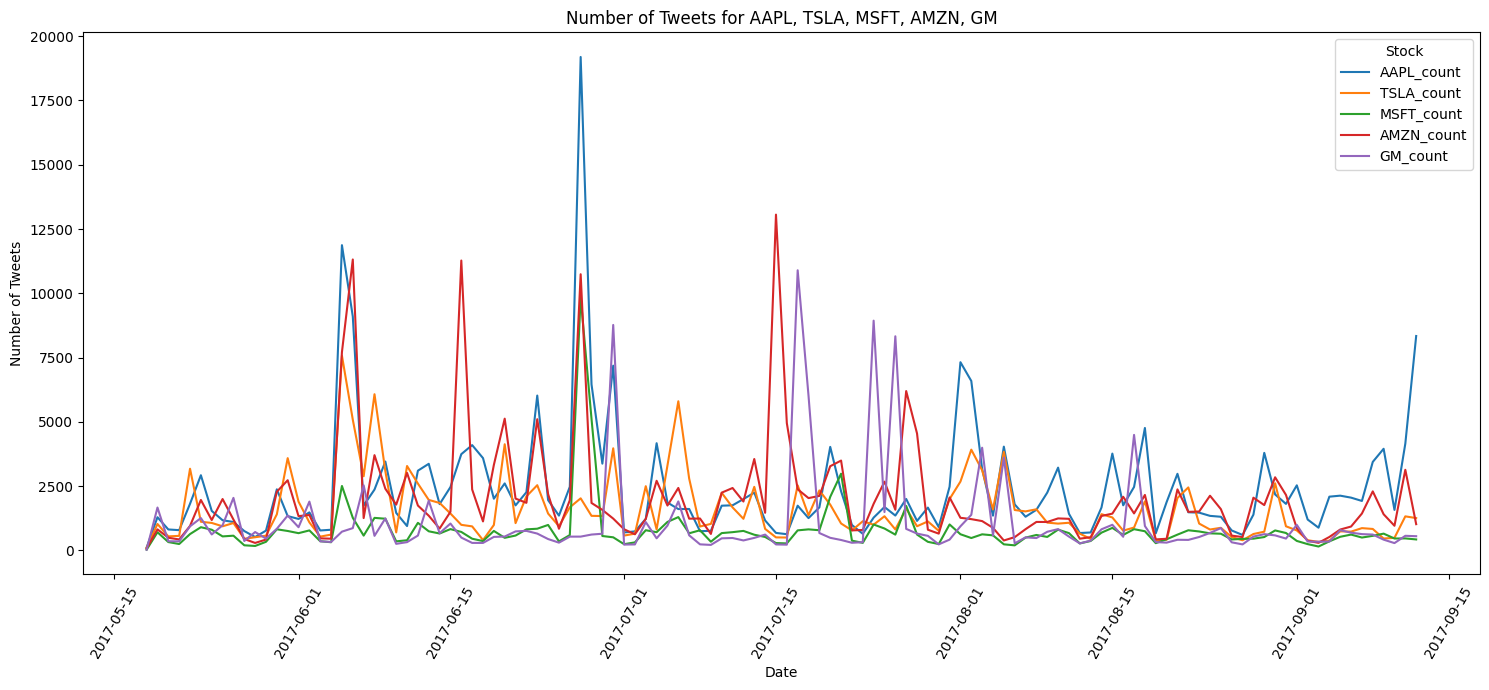

In [20]:

df_tweets['date'] = df_tweets['created_at'].dt.date

tweet_counts = pd.DataFrame()

stocks = ['AAPL', 'TSLA', 'MSFT', 'AMZN', 'GM'] # chosen stocks

for stock in stocks:

    # Filter df_entities for the current stock's cashtag
    stock_entities = df_entities[df_entities['text'].str.contains(stock, na=False)]
    
    # Filter df_tweets for tweets that mention the current stock's cashtag
    stock_tweets = df_tweets[df_tweets['id'].isin(stock_entities['tweet_id'])]
    
    # Group tweets by date and count 
    stock_tweet_counts = stock_tweets.groupby('date').size().reset_index(name=f'{stock}_count')
    
    if tweet_counts.empty:
        tweet_counts = stock_tweet_counts
    else:
        tweet_counts = tweet_counts.merge(stock_tweet_counts, on='date', how='outer')

# Replace NaN values with 0
tweet_counts.fillna(0, inplace=True)


tweet_counts_melted = tweet_counts.melt(id_vars=['date'], var_name='Stock', value_name='Tweet Count')

# Plot
plt.figure(figsize=(15, 7))
sns.lineplot(data=tweet_counts_melted, x='date', y='Tweet Count', hue='Stock')

plt.title('Number of Tweets for AAPL, TSLA, MSFT, AMZN, GM')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.legend(title='Stock')
plt.xticks(rotation=60)  
plt.tight_layout()  
plt.show()

### Explanation of the graph and approach

This report gives an analysis of the tweet volume about five major publicly traded companies. The goal is to observe how discussions around these companies fluctuate over time and if there are any noticeable trends or patterns that emerge when comparing different sectors. The companies included in this analysis are Apple Inc., Tesla Inc., Microsoft Corp., General Motors Co., and Amazon.com Inc.

### Explanation of the data

The data analyzed spans from May 15, 2017, to September 15, 2017. For each company, the daily number of tweets mentioning their stock ticker symbol was tracked. These counts were then plotted on a time series graph to visualize the distribution and volume of tweets over time.

### Analysis

#### Trend Overview

- **Apple Inc. (AAPL)**:
  - Consistently maintains tweet volumes with occasional peaks. Represents the technology sector and is often discussed in the context of product releases and corporate earnings reports.

- **Microsoft Corp. (MSFT)**:
  - Consistently maintains tweet volumes with occasional peaks. Represents the technology sector and is often discussed in the context of product releases and corporate earnings reports.

- **Tesla Inc. (TSLA)**:
  - Exhibits more pronounced spikes in tweet volume, which may correlate with news events specific to the automotive or energy sectors, such as product launches or announcements by Elon Musk.

- **General Motors Co. (GM)**:
  - Has a few notable peaks, potentially related to automotive industry trends, regulatory news, or financial reports.

- **Amazon.com Inc. (AMZN)**:
  - Shows significant variability in tweet volume, potentially reflecting events in the retail sector or company-specific news such as Prime Day or earnings releases.


#### Specific Observations

-  **General Motors Co. (GM)** has relatively low number of tweets but its peaks are noticeable.
- The largest peak for **Tesla (TSLA)** in late June could be associated with a significant company milestone or a high-impact announcement.
- A similar, although smaller, peak in tweet volume is observed for **Amazon (AMZN)** in mid-July, which may correspond with its annual Prime Day event.
- **Apple (AAPL)** shows a substantial peak in early September, often associated with its yearly product announcement event.


### Conclusion

The data reveals that both company-specific occurrences and broader sectoral trends produce a substantial impact on the level of public engagement on social media platforms like Twitter. Through a thorough analysis of tweet volumes over time, stakeholders can extract valuable insights into public interest and sentiment. These insights have the potential to inform decision-making processes, be it in the realms of marketing, investment, or public relations strategies.

### 3. Statistics on distributions of all financial tweets over time. 

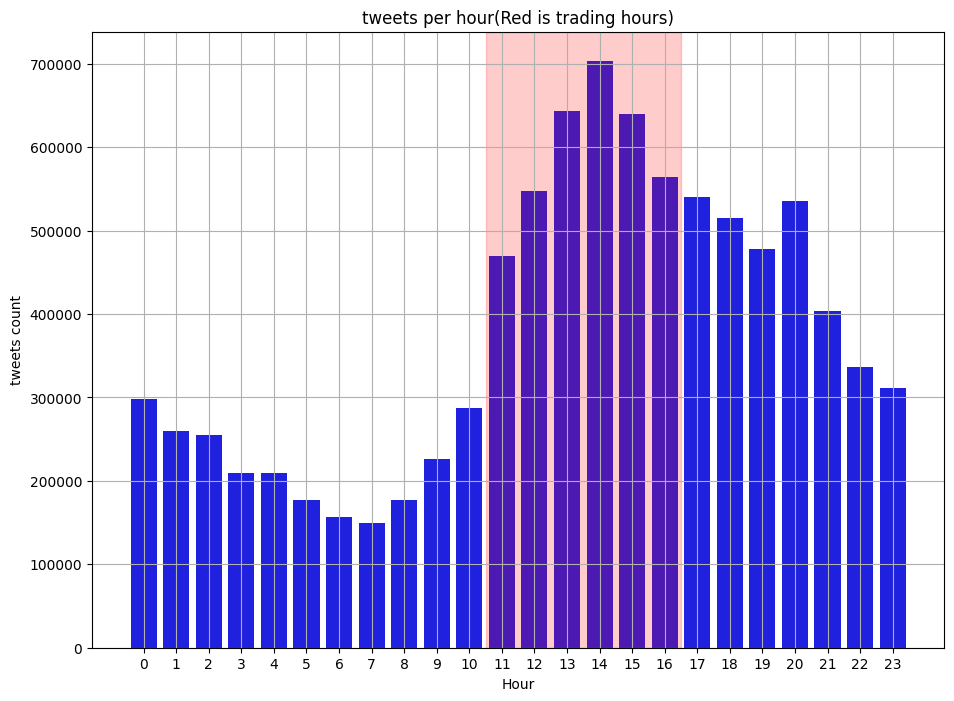

In [21]:
# Extract the hour from the 'created_at' column
df_tweets['hour'] = df_tweets['created_at'].dt.hour
tweet_counts_by_hour = df_tweets.groupby('hour').size().reset_index(name='tweet_count')


plt.figure(figsize=(11, 8))
sns.barplot(x='hour', y='tweet_count', data=tweet_counts_by_hour, color='blue')

#trading hours: 11 am to 4:00 pm EST
plt.axvspan(10.5, 16.5, color='red', alpha=0.2)

plt.title('tweets per hour(Red is trading hours)')
plt.xlabel('Hour')
plt.ylabel('tweets count')
plt.grid(True)
plt.show()

increase in tweets during noon.
this is caused by:
- **Tweet Activity**: Begins to rise from midnight and sees a gradual increase, with a significant uptick from the 9th hour which aligns with the opening of standard trading hours.
- **Peak Activity**: Noted during late trading hours, suggesting a correlation with market closing summaries and reactions to the day's financial events.
- **Post Trading Hours**: There is a decline in tweet volume, indicating less discussion outside typical market operation times.

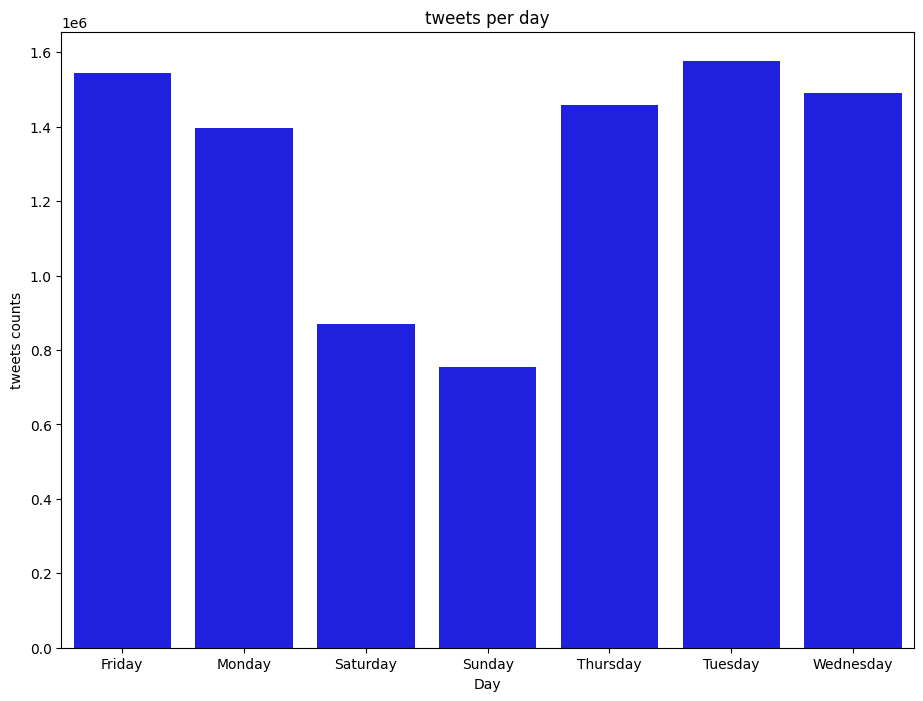

In [22]:
df_tweets['day'] = df_tweets['created_at'].dt.day_name()
tweet_counts_by_day = df_tweets.groupby('day').size().reset_index(name='tweet_count')

# Plot using 
plt.figure(figsize=(11, 8))
sns.barplot(x='day', y='tweet_count', data=tweet_counts_by_day, color='blue')

plt.title('tweets per day')
plt.xlabel('Day')
plt.ylabel('tweets counts')
plt.show()

as you can see, less tweets during the weekends.

The lower volume of tweets about a company stock during weekends can be attributed to several factors:

1. **Market Closure:** Stock markets are typically closed during weekends, leading to a decrease in financial activity and related discussions. With no real-time market movements, there is less immediate information to discuss or analyze.

2. **Reduced Business Operations:** Many companies release news, updates, or financial reports during weekdays when businesses are operational. The lack of significant corporate activities or announcements during weekends may contribute to a decrease in related discussions.

3. **Professional Engagement:** During weekdays, financial professionals, traders, and investors are actively involved in market activities. On weekends, these individuals may take a break from work-related discussions, leading to a decline in financial-related tweets.

4. **General Social Media Patterns:** Social media engagement patterns often show a decline during weekends as people tend to focus on leisure activities and personal interests rather than professional or financial discussions.

Overall, the combination of market closure, reduced business activities, and shifts in social media engagement patterns contribute to the observed decrease in tweets about company stocks during weekends.


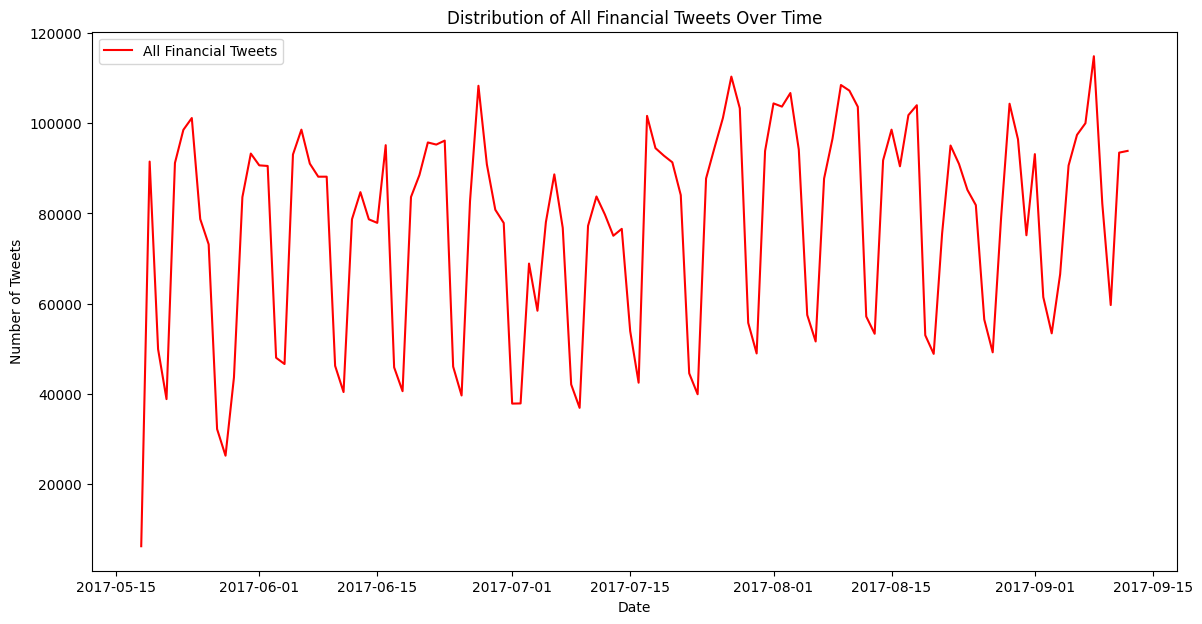

In [23]:
tweet_counts_by_date = df_tweets.groupby('date').size().reset_index(name='tweet_count')

# plot
plt.figure(figsize=(14, 7))
sns.lineplot(data=tweet_counts_by_date, x='date', y='tweet_count', label='All Financial Tweets', color = 'red')

plt.title('Distribution of All Financial Tweets Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.legend()
plt.show()

as you can see, there are significant fluctuations in tweets during these months.

- **Fluctuations**: Significant ebb and flow in the volume of tweets throughout the observed period.
- **Spikes**: These may correspond with major financial events, market shocks, or economic data releases.
- **Cyclical Patterns**: Suggest a correlation with weekly market activity, with valleys potentially indicating weekends or non-trading days.

These outputs collectively provide insights into the temporal dynamics of financial discussions on Twitter, which could be beneficial for financial analysts, traders, or social media strategists interested in public sentiment, planning of social media engagement, or identification of significant financial events as reflected in social media activity.



# Statistics on most important financial information on individual stocks (at least 2 chosen stocks) computed solely from the financial information (not tweets).

In [34]:
stocks = ['AAPL', 'TSLA', 'MSFT', 'GM', 'AMZN']


df_stock_tweets = pd.DataFrame()

for stock in stocks:
    stock_entities = df_entities[df_entities['text'].str.contains(stock, na=False)]
    
    stock_retweets = df_tweets[df_tweets['retweeted_status_id'].isin(stock_entities['tweet_id'])]
    
    retweet_counts = stock_retweets.groupby('hour').size().reset_index(name=f'{stock}_count')
    
    if df_stock_tweets.empty:
        df_stock_tweets = retweet_counts
    else:
        df_stock_tweets = df_stock_tweets.merge(retweet_counts, on='hour', how='outer')

# Fill Nan with 0
df_stock_tweets.fillna(0, inplace=True)

#### let the plotting begin (again)

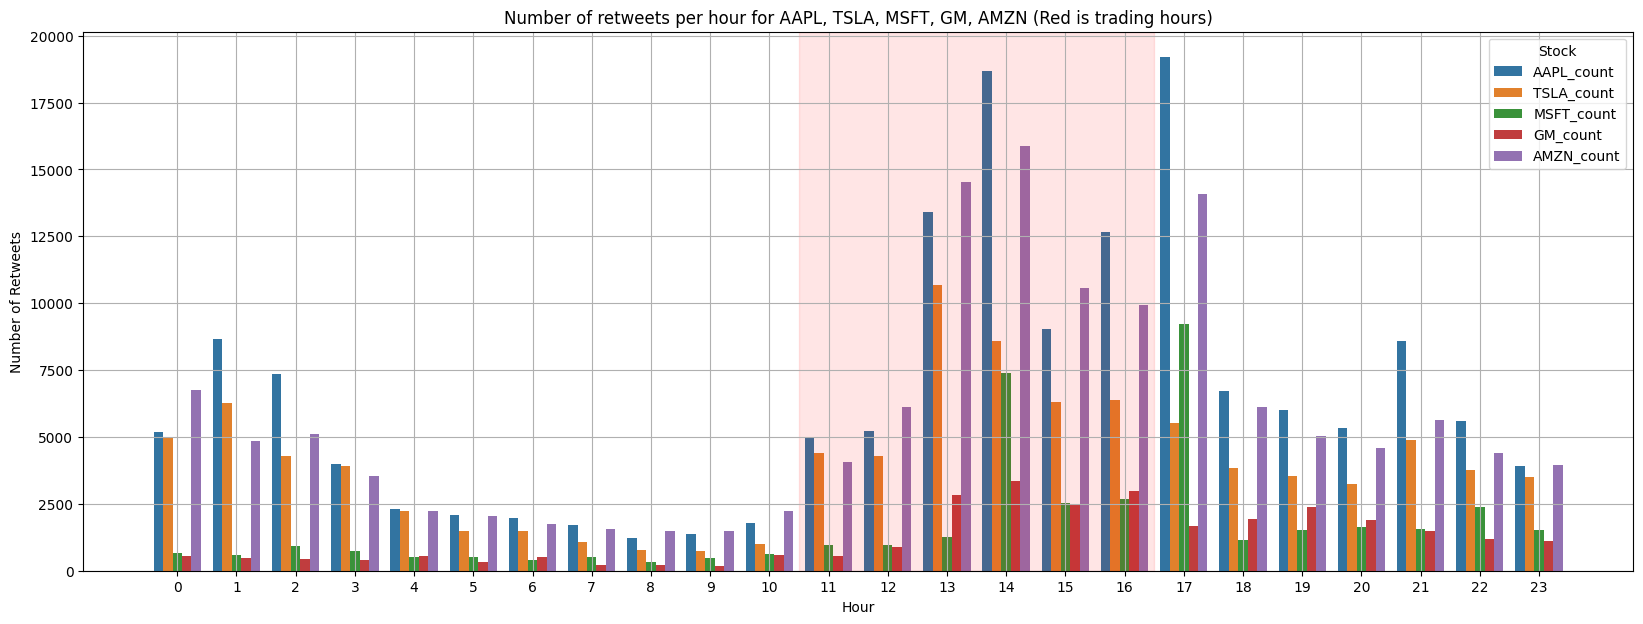

In [35]:
df_melted = df_stock_tweets.melt(id_vars='hour', var_name='Stock', value_name='Retweet Count')

# Plot 
plt.figure(figsize=(20, 7))
sns.barplot(x='hour', y='Retweet Count', hue='Stock', data=df_melted)


plt.axvspan(10.5, 16.5, color='red', alpha=0.1)

plt.title('Number of retweets per hour for AAPL, TSLA, MSFT, GM, AMZN (Red is trading hours)')
plt.xlabel('Hour')
plt.ylabel('Number of Retweets')
plt.legend(title='Stock')
plt.grid(True)
plt.show()

the points below can be seen in the graph:
- Higher retweet volumes during the most active times suggest increased user engagement.
- Peaks in retweet volumes may correlate with significant news events or market reactions.
- Apple and Amazon stocks, in particular, show high retweet volumes, indicating strong public interest or response to events.

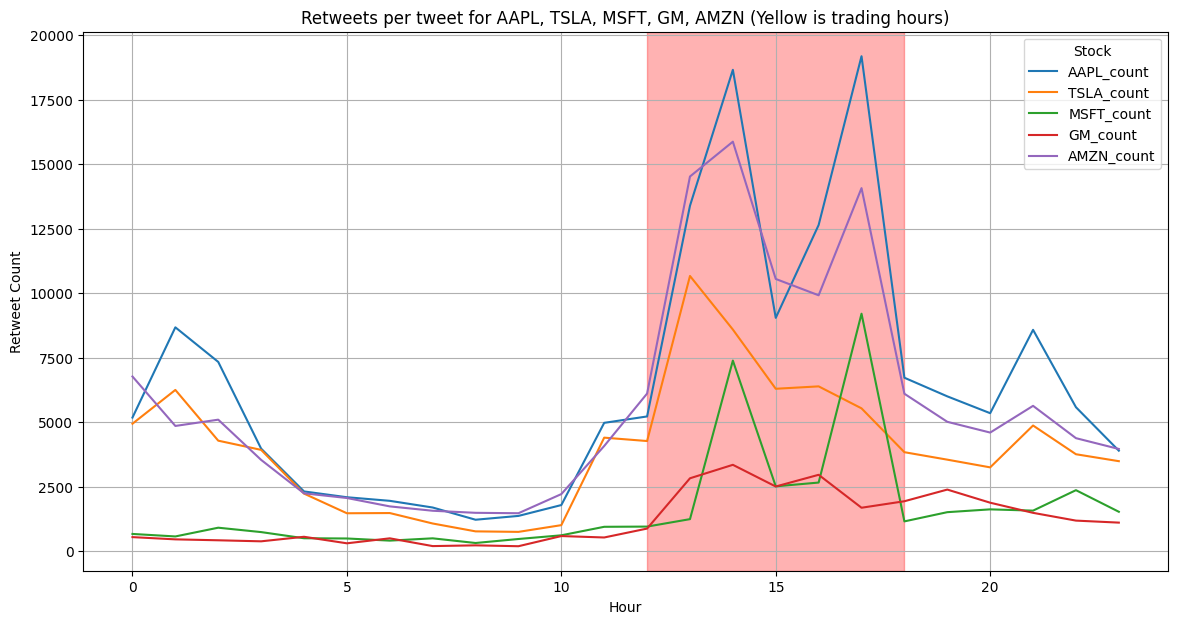

In [36]:
# Plot using Seaborn
plt.figure(figsize=(14, 7))

# Use Seaborn to plot the data
sns.lineplot(data=df_melted, x='hour', y='Retweet Count', hue='Stock')
sns.lineplot()
# Highlight trading hours (9:30 am to 4:00 pm EST)
plt.axvspan(12, 18, color='red', alpha=0.3)

plt.title('Retweets per tweet for AAPL, TSLA, MSFT, GM, AMZN (Yellow is trading hours)')
plt.xlabel('Hour')
plt.ylabel('Retweet Count')
plt.legend(title='Stock')
plt.grid(True)
plt.show()


 Sharp peaks during the most viewed times indicate moments when tweets about these stocks were particularly resonant or aligned with important announcements.


#### 2 stocks (Tesla vs GM)

In [37]:

# exactly same as before so I won't comment

stocks = ['TSLA', 'GM']

df_stock_tweets = pd.DataFrame()

for stock in stocks:
    stock_entities = df_entities[df_entities['text'].str.contains(stock, na=False)]
    
    stock_retweets = df_tweets[df_tweets['retweeted_status_id'].isin(stock_entities['tweet_id'])]
    
    retweet_counts = stock_retweets.groupby('hour').size().reset_index(name=f'{stock}_count')
    
    if df_stock_tweets.empty:
        df_stock_tweets = retweet_counts
    else:
        df_stock_tweets = df_stock_tweets.merge(retweet_counts, on='hour', how='outer')

df_stock_tweets.fillna(0, inplace=True)

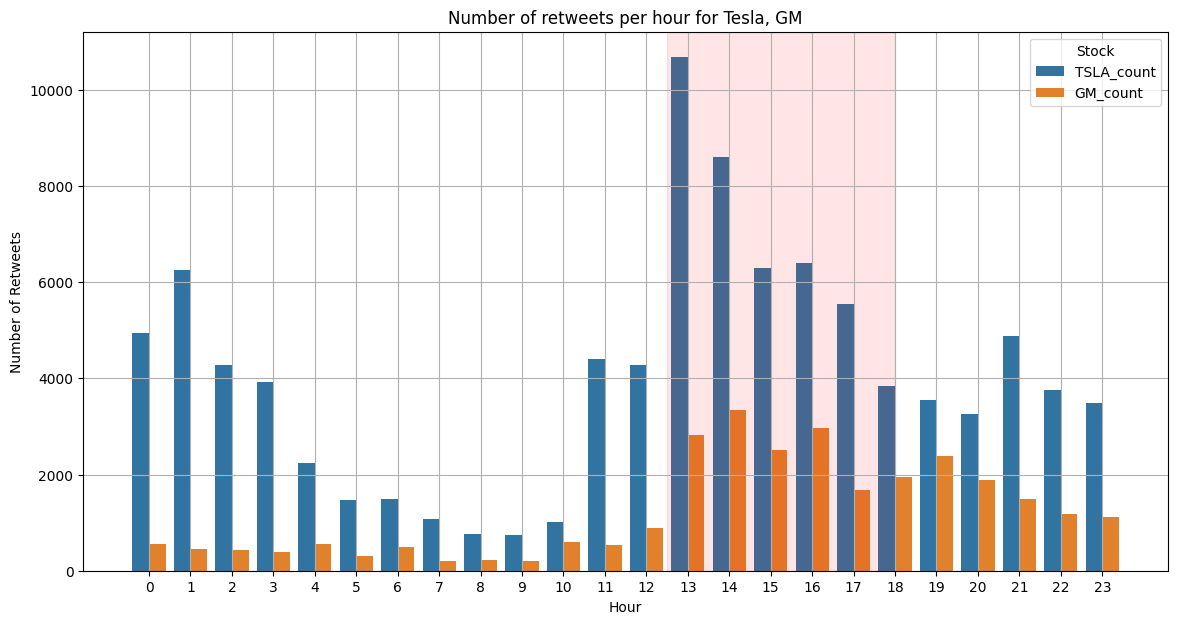

In [38]:
# plotting
df_melted = df_stock_tweets.melt(id_vars='hour', var_name='Stock', value_name='Retweet Count')

# Plot 
plt.figure(figsize=(14, 7))
sns.barplot(x='hour', y='Retweet Count', hue='Stock', data=df_melted)

plt.axvspan(12.5, 18, color='red', alpha=0.1)

plt.title('Number of retweets per hour for Tesla, GM')
plt.xlabel('Hour')
plt.ylabel('Number of Retweets')
plt.legend(title='Stock')
plt.grid(True)
plt.show()

- Significant retweets for Tesla even though GM has been around for a long time.
- The similarity in engagement patterns suggests a possible overlap in the audience interested in these stocks.

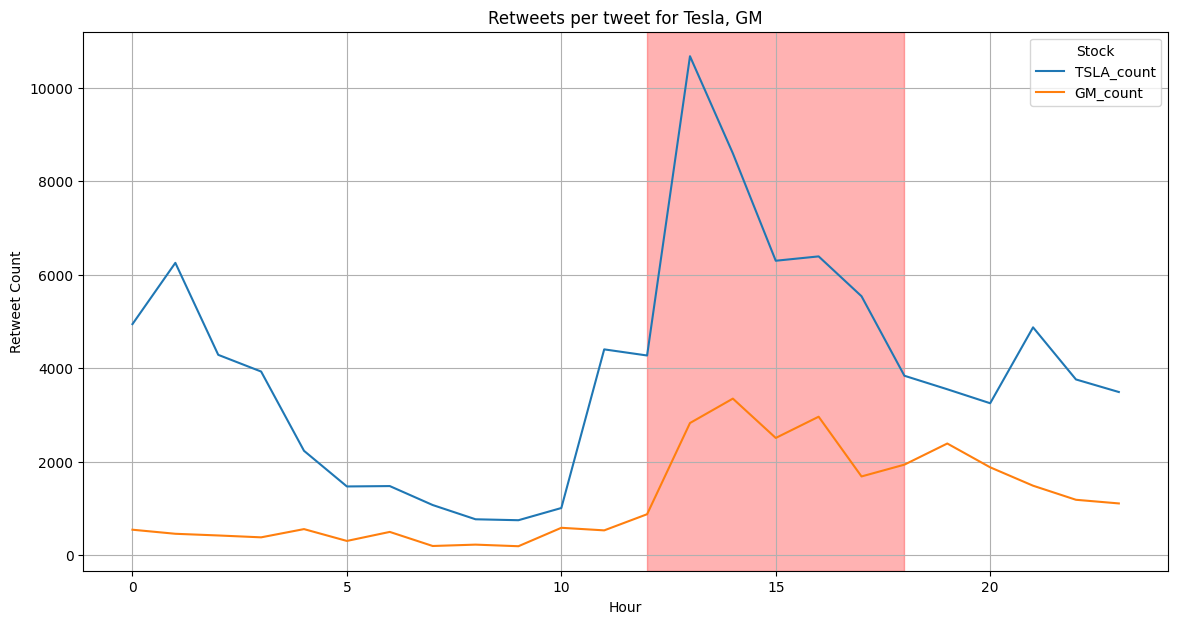

In [39]:
plt.figure(figsize=(14, 7))

sns.lineplot(data=df_melted, x='hour', y='Retweet Count', hue='Stock')
sns.lineplot()
plt.axvspan(12, 18, color='red', alpha=0.3)

plt.title('Retweets per tweet for Tesla, GM')
plt.xlabel('Hour')
plt.ylabel('Retweet Count')
plt.legend(title='Stock')
plt.grid(True)
plt.show()


- The ratio of retweets per tweet spikes during the most viewed times, implying that content about these stocks is highly engaging during these periods.
- Engagement patterns for GM and Tesla reveal both correlations and divergences, suggesting different user behaviors in sharing information about these stocks.

# Statistics on most important financial information on individual stocks (at least 2 chosen stocks) computed solely from the financial information (not tweets). 

In [40]:
df_companies.head()

,ticker,name,exchange,capitalization,tweet_count
0,A,Agilent Technologies,NYSE,1.915000e-20,9954.0
1,AA,Alcoa Corp,NYSE,6.480000e-21,5585.0
2,AAAG,AAA Century Group US,OTCMKTS,9.480000e-24,0.0
3,AAAIF,ALTERNATIVE INV TR N,OTCMKTS,7.840000e-24,0.0
4,AAALF,AAREAL BANK AG NPV,OTCMKTS,1.720000e-21,9.0


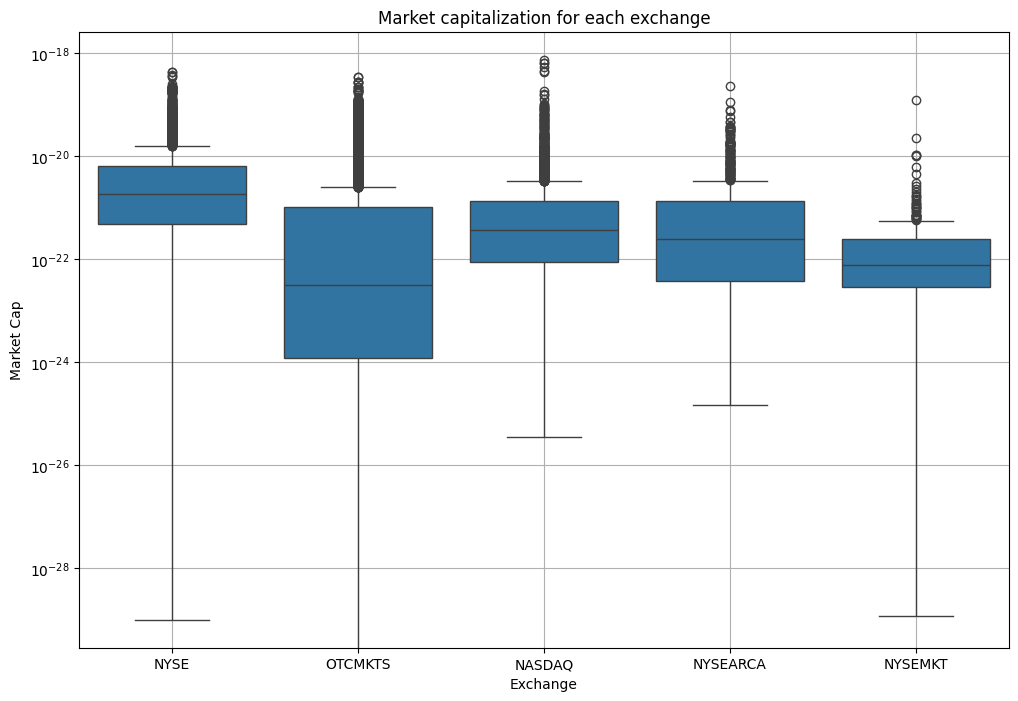

In [41]:
# boxplot with a logarithmic scale

plt.figure(figsize=(12, 8))
sns.boxplot(x='exchange', y='capitalization', data=df_companies)
plt.yscale('log')  
plt.title('Market capitalization for each exchange')
plt.xlabel('Exchange')
plt.ylabel('Market Cap')
plt.grid(True)
plt.show()

In [52]:
exchange_stats = df_companies.groupby('exchange')['capitalization'].agg(['mean', 'var', 'min', 'max'])
exchange_stats

,mean,var,min,max
exchange,,,,
NASDAQ,3.940251e-21,8.734746e-40,3.500000e-26,7.485500e-19
NYSE,1.023234e-20,8.885482e-40,1.000000e-29,4.302300e-19
NYSEARCA,3.217465e-21,1.547518e-40,1.445000e-25,2.341300e-19
NYSEMKT,8.052759e-22,5.094430e-41,1.200000e-29,1.239800e-19
OTCMKTS,2.821516e-21,1.362398e-40,1.000000e-30,3.416800e-19


in this code we will compute top companies for each exchange.

In [42]:
# # Let's compute statistical parameters for each exchange
# # Group by 'exchange' and compute statistical parameters for 'market_capitalization'
# exchange_stats = df_companies.groupby('exchange')['capitalization'].agg(['mean', 'var', 'min', 'max'])

df_companies['rank'] = df_companies.groupby('exchange')['capitalization'].rank(method='max', ascending=False)
df_companies = df_companies.dropna(subset=['capitalization'])
df_companies = df_companies[df_companies['capitalization'] != 0]

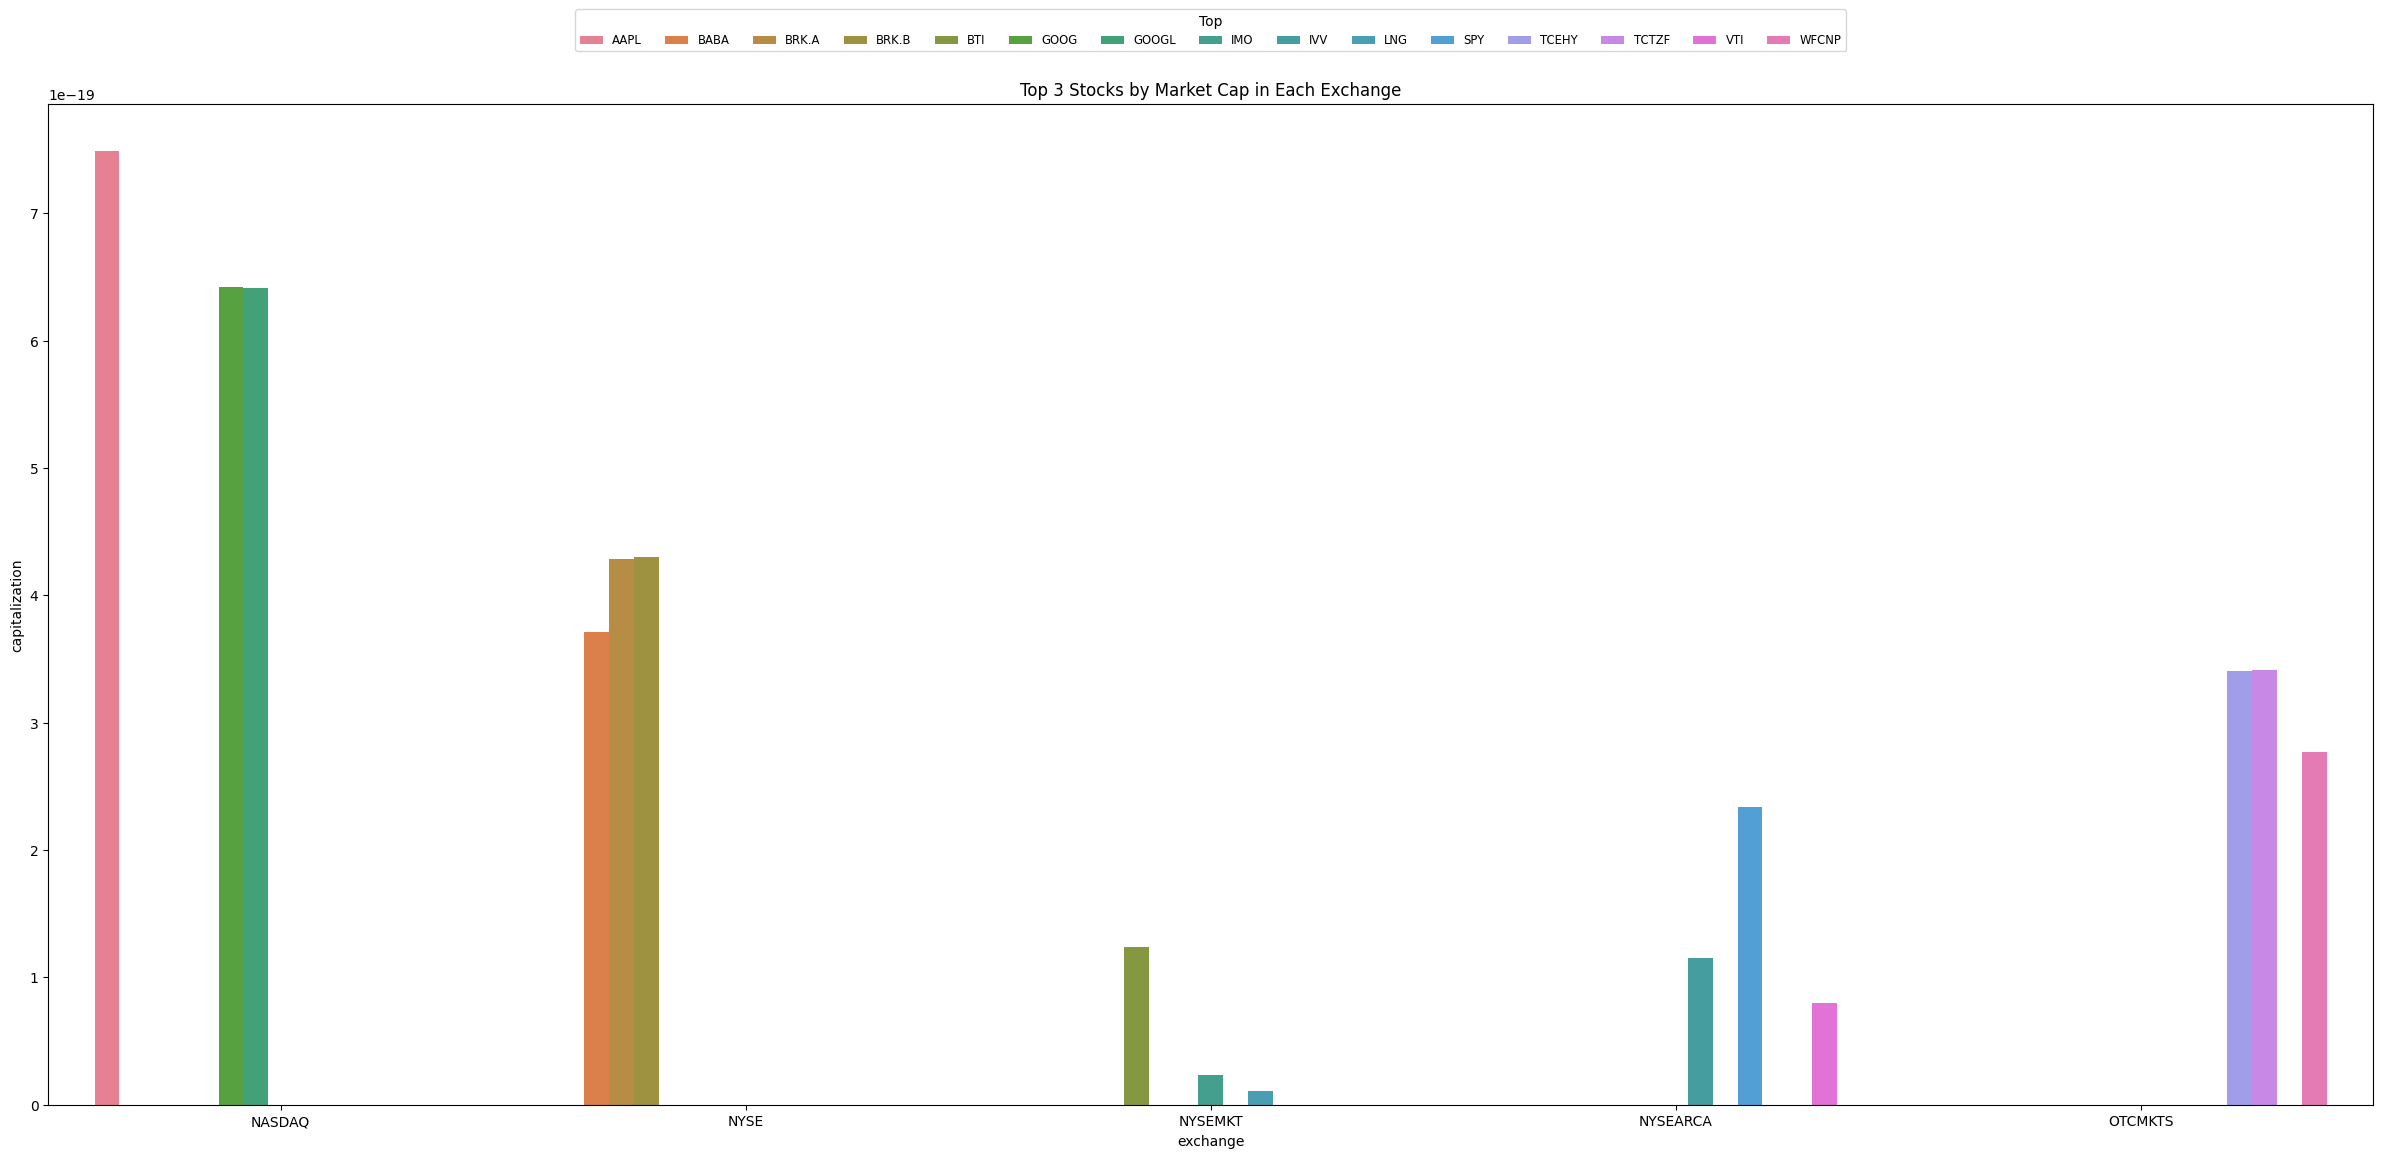

In [46]:
top_stocks = df_companies[df_companies['rank'] <= 3]


plt.figure(figsize=(30, 13))
sns.barplot(data=top_stocks, x='exchange', y='capitalization', hue='ticker', )
plt.title('Top 3 Stocks by Market Cap in Each Exchange')
plt.legend(title='Top', bbox_to_anchor=(0.5, 1.1), loc='upper center', ncol=len(top_stocks['ticker'].unique()), fontsize='small', title_fontsize='medium')
plt.show()


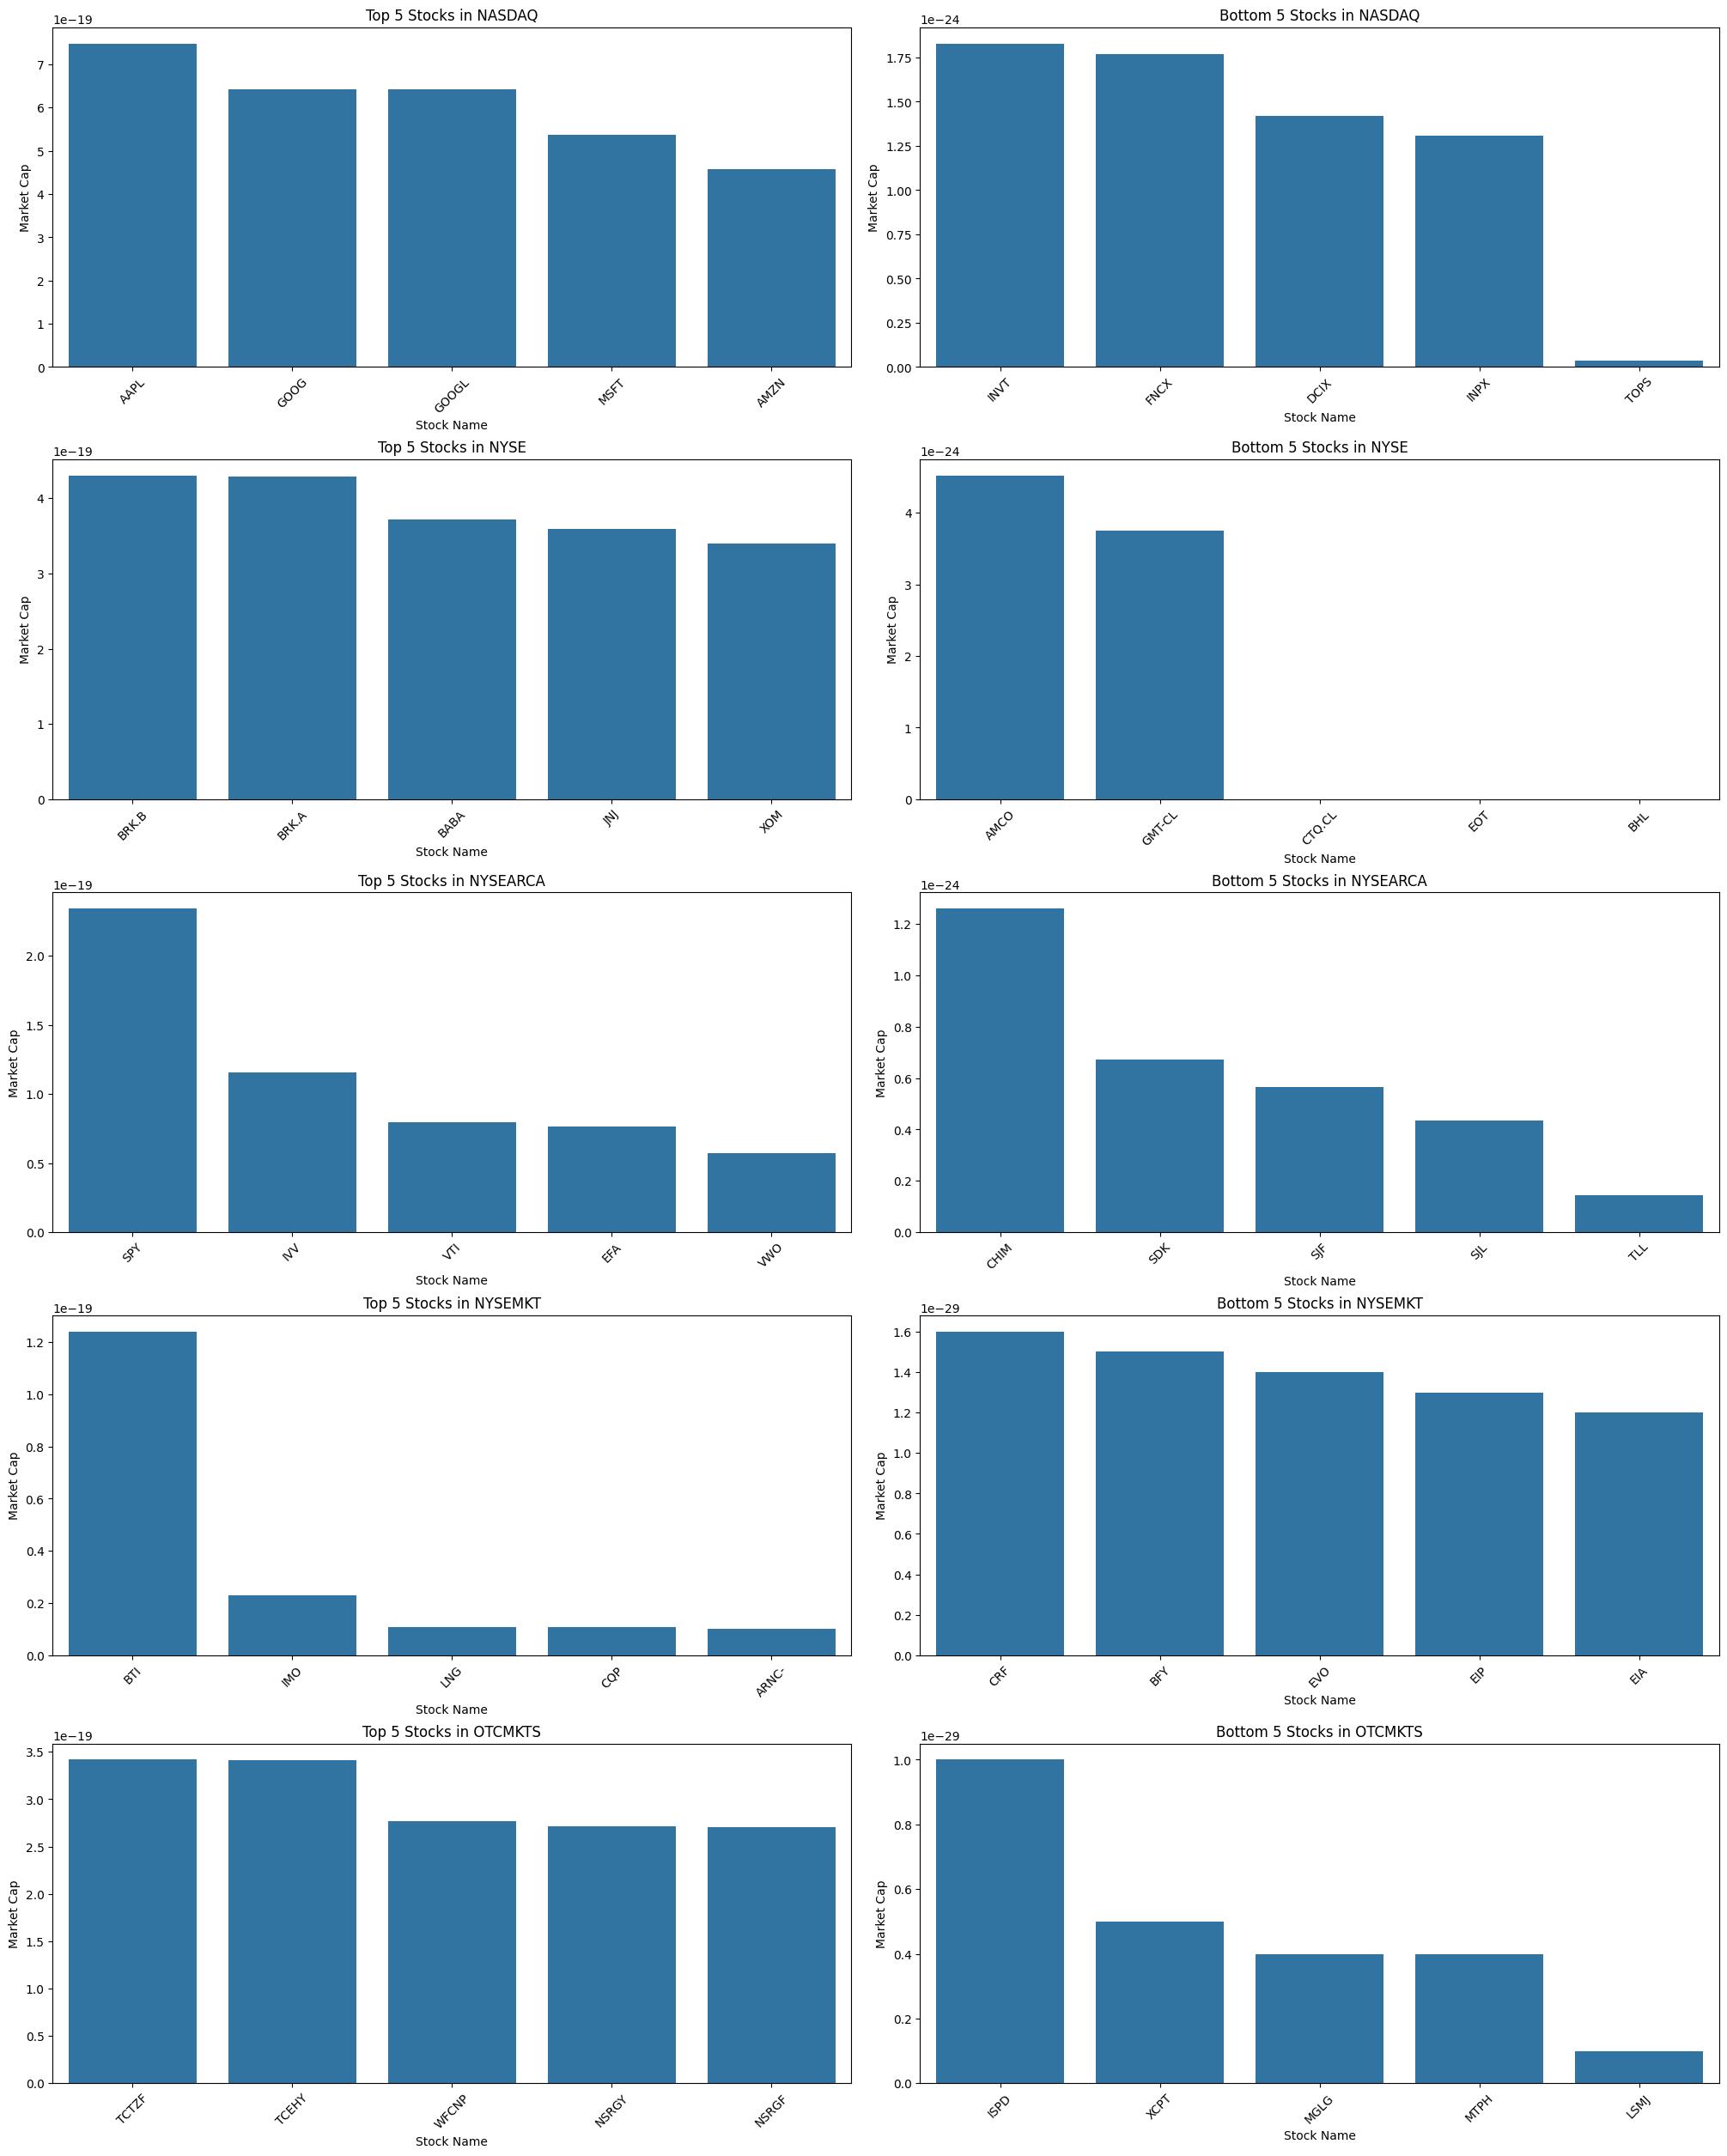

In [48]:
df_companies['capitalization'] = df_companies['capitalization'].astype(float) 
df_companies_sorted = df_companies.sort_values(by=['exchange', 'capitalization'], ascending=[True, False])


exchanges = df_companies_sorted['exchange'].dropna().unique()
num_exchanges = len(exchanges)
fig, axs = plt.subplots(num_exchanges, 2, figsize=(20, num_exchanges * 5), constrained_layout=True)


for i, exchange in enumerate(exchanges):
    # Filter the DataFrame for the current exchange
    df_exchange = df_companies_sorted[df_companies_sorted['exchange'] == exchange]
    df_exchange = df_exchange.dropna(subset=['capitalization'])
    df_exchange = df_exchange[df_exchange['capitalization'] != 0]
    
    # Get the top 5 and bottom 5 stocks by market capitalization within the exchange
    top_stocks = df_exchange.head(5)
    bottom_stocks = df_exchange.tail(5)
    
    # Plot for the top 5 stocks
    sns.barplot(ax=axs[i, 0], data=top_stocks, x='ticker', y='capitalization')
    axs[i, 0].set_title(f'Top 5 Stocks in {exchange}')
    axs[i, 0].set_xlabel('Stock Name')
    axs[i, 0].set_ylabel('Market Cap')
    axs[i, 0].tick_params(axis='x', rotation=45)
    
    # Plot for the bottom 5 stocks
    sns.barplot(ax=axs[i, 1], data=bottom_stocks, x='ticker', y='capitalization')
    axs[i, 1].set_title(f'Bottom 5 Stocks in {exchange}')
    axs[i, 1].set_xlabel('Stock Name')
    axs[i, 1].set_ylabel('Market Cap')
    axs[i, 1].tick_params(axis='x', rotation=45)

# Display the plots
plt.show()



### Time series movement directions through time for individual stocks (at least 2). Choose companies you are familiar with. Try to explain the reason behind these directions from real world news.

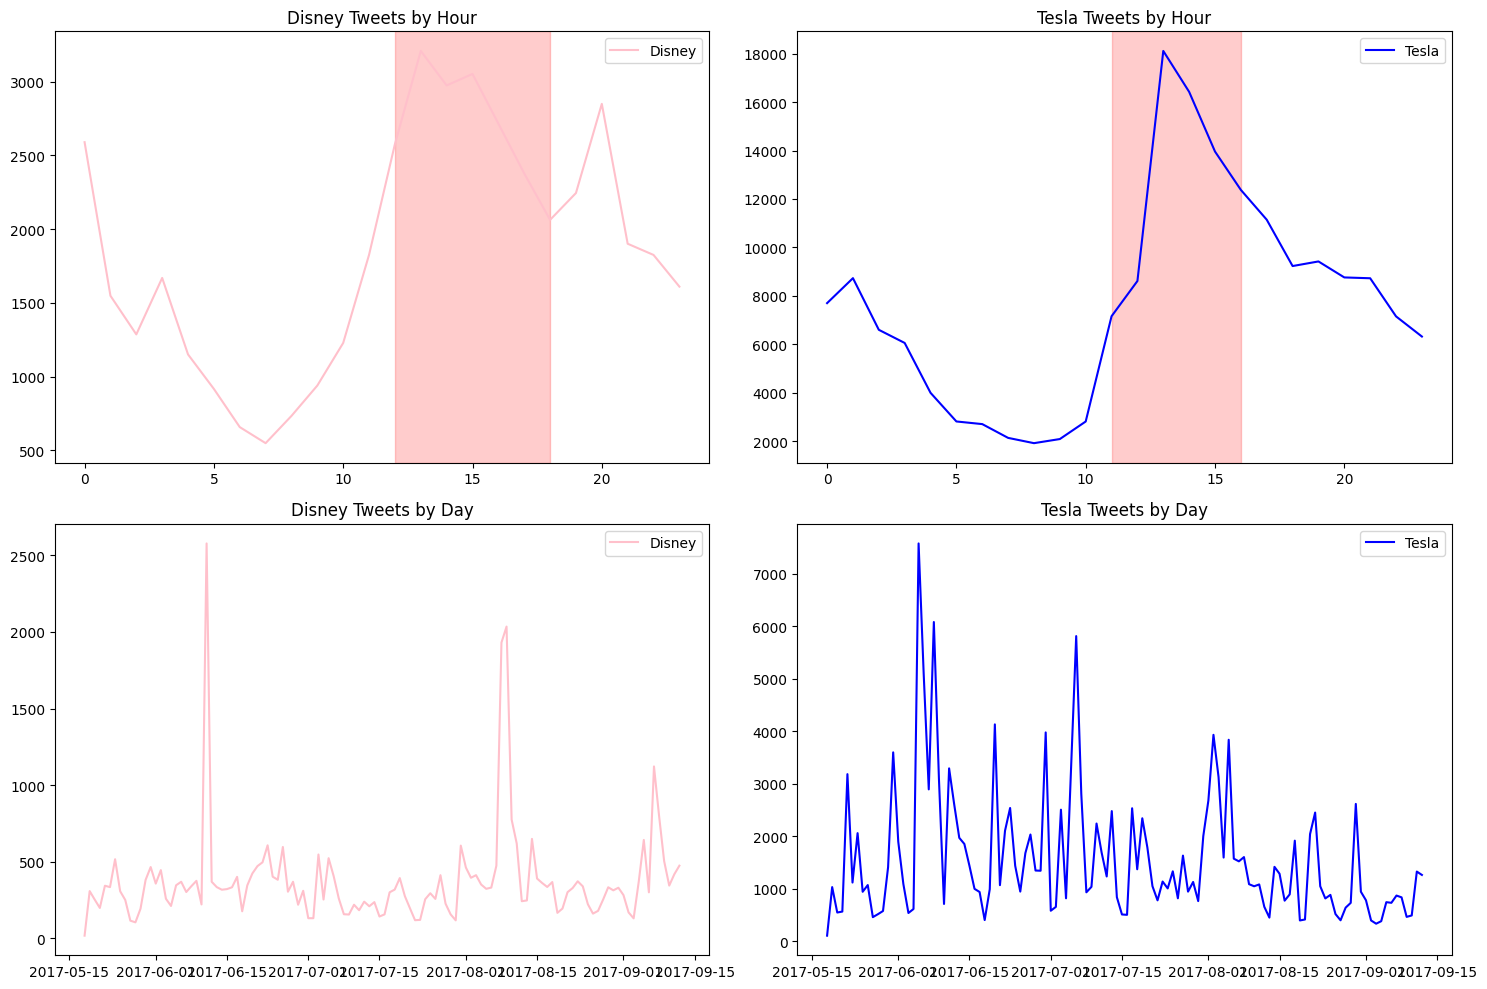

In [53]:
# Filter tweets for Disney and Tesla
apple_tweets = df_tweets[df_tweets['text'].str.contains('DIS')]
tesla_tweets = df_tweets[df_tweets['text'].str.contains('TSLA')]

# Group and count tweets by date and hour
apple_tweets_count_by_hour = apple_tweets.groupby('hour').size()
tesla_tweets_count_by_hour = tesla_tweets.groupby('hour').size()

apple_tweets_count_by_day = apple_tweets.groupby('date').size()
tesla_tweets_count_by_day = tesla_tweets.groupby('date').size()

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# number of tweets by hour for Disney
axs[0, 0].plot(apple_tweets_count_by_hour.index, apple_tweets_count_by_hour.values, label='Disney', color = 'pink')
axs[0, 0].axvspan(12, 18, color='red', alpha=0.2)

# number of tweets by hour for Tesla
axs[0, 1].plot(tesla_tweets_count_by_hour.index, tesla_tweets_count_by_hour.values, label='Tesla', color='blue')
axs[0, 1].axvspan(11, 16, color='red', alpha=0.2)

# number of tweets by day for Disney
axs[1, 0].plot(apple_tweets_count_by_day.index, apple_tweets_count_by_day.values, label='Disney', color = 'pink')

# number of tweets by day for Tesla
axs[1, 1].plot(tesla_tweets_count_by_day.index, tesla_tweets_count_by_day.values, label='Tesla', color='blue')


axs[0, 0].set_title('Disney Tweets by Hour')
axs[0, 1].set_title('Tesla Tweets by Hour')
axs[1, 0].set_title('Disney Tweets by Day')
axs[1, 1].set_title('Tesla Tweets by Day')

# Show legend
for ax in axs.flat:
    ax.legend()

plt.tight_layout()
plt.show()


### Disney and Tesla Tweet Analysis

The provided visualizations represent tweet activity for Disney (DIS) and Tesla (TSLA) based on specific time intervals: hourly and daily.

#### Disney Tweets by Hour

The plot illustrates the number of tweets about Disney throughout a typical day. The red highlighted area likely represents the market trading hours, where we observe increased tweet volume. This pattern suggests that Twitter users are more active during trading hours, possibly reacting to market movements or sharing information relevant to Disney's stock performance.

#### Tesla Tweets by Hour


Similarly, the Tesla plot shows tweet volume per hour. The highlighted period, presumably the trading hours, shows a peak, indicating heightened activity that could be attributed to market developments or company-specific news.

#### Disney Tweets by Day


This time series plot of daily tweet volume for Disney over several months reveals spikes that may correlate with significant company events, such as new project announcements or quarterly earnings reports. 

#### Tesla Tweets by Day


The Tesla daily tweet plot also displays variabilities potentially linked to the company's quarterly reports or major announcements or just Elon Musk goofing around. Just like with Disney, the end of each fiscal quarter shows an increased number of tweets, possibly reflecting public response to Tesla's financial updates.





# Co-occurrence of various stocks in the same tweets

In [59]:
df_entities.dropna(subset=['text'], inplace=True)

# Filter tweets mentioning Tesla and Apple
sam_tweets = df_entities[df_entities['text'].str.contains('TSLA')]
apple_tweets = df_entities[df_entities['text'].str.contains('AAPL')]


aapl_tweets_full = apple_tweets.merge(df_tweets, left_on='tweet_id', right_on='id')
sam_tweets_full = sam_tweets.merge(df_tweets, left_on='tweet_id', right_on='id')

# Count the number of tweets per day for both stocks
aapl_daily_count = aapl_tweets_full.groupby('date')['id'].count().reset_index(name='AAPL')
sam_daily_count = sam_tweets_full.groupby('date')['id'].count().reset_index(name='TSLA')

# calculate co-occurrence count for days when both stocks are mentioned
co_occurrence_daily = pd.merge(aapl_daily_count, sam_daily_count, on='date', how='outer').fillna(0)

# Analyze the correlation between the daily tweet counts for 'AAPL' and 'TSLA'
correlation = co_occurrence_daily[['AAPL', 'TSLA']].corr().iloc[0, 1]
print(f"The correlation between daily tweet counts for 'AAPL' and 'TSLA' is: {correlation}")

The correlation between daily tweet counts for 'AAPL' and 'TSLA' is: 0.43520090759924157


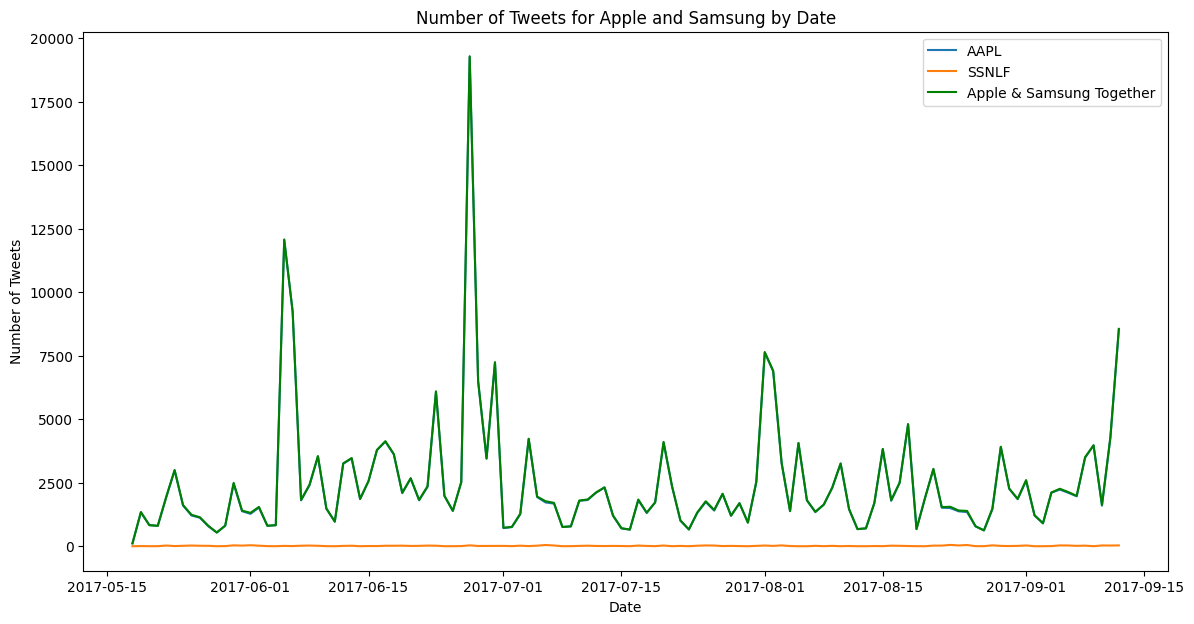

In [58]:
# Step 6: Plot the daily tweet counts and co-occurrence
plt.figure(figsize=(14, 7))
plt.plot(co_occurrence_daily['date'], co_occurrence_daily['AAPL'], label='AAPL')
plt.plot(co_occurrence_daily['date'], co_occurrence_daily['TSLA'], label='TSLA')
plt.plot(co_occurrence_daily['date'], co_occurrence_daily['AAPL'] + co_occurrence_daily['TSLA'], 
         label='Apple & Tesla Together', color='green')
plt.legend()
plt.title('Number of Tweets for Apple and Tesla by Date')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.show()